In [18]:
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
df = pd.read_csv("MLRHDLC.csv", skiprows = 1)

In [13]:
df.head()

,Día,Juan Carlos Pinzón: (Colombia),Humberto de la Calle: (Colombia),Marta Lucía Ramírez: (Colombia)
0,2018-01-01,0,0,8
1,2018-01-02,0,5,0
2,2018-01-03,0,0,5
3,2018-01-04,5,5,14
4,2018-01-05,0,19,9


In [14]:
df["Pinzon"] = df["Juan Carlos Pinz\xc3\xb3n: (Colombia)"]
df["MLR"] = df["Marta Luc\xc3\xada Ram\xc3\xadrez: (Colombia)"]
df["HDLC"] = df["Humberto de la Calle: (Colombia)"]

In [15]:
df.shape

(56, 7)

In [16]:
dia = pd.date_range(start= "01/01/2018", periods = 56 , freq='D')

In [21]:
import seaborn

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


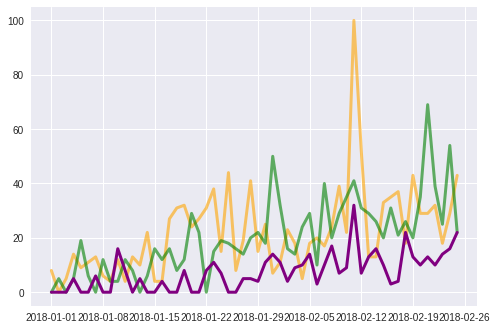

In [58]:
pl.plot(dia,df.MLR, label = "Martha Lucia Ramirez", lw=3, color = "orange", alpha = 0.6)
pl.plot(dia,df.HDLC, label = "Humberto de La Calle", lw=3, color = "green", alpha = 0.6)
pl.plot(dia,df.Pinzon, label = "Pinzon", lw=3, color = "purple")

In [26]:
MediaMLR = pd.rolling_mean(df.MLR, 5)
MediaHDLC  = pd.rolling_mean(df.HDLC, 5)
MediaPinzon  = pd.rolling_mean(df.Pinzon, 5)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  app.launch_new_instance()


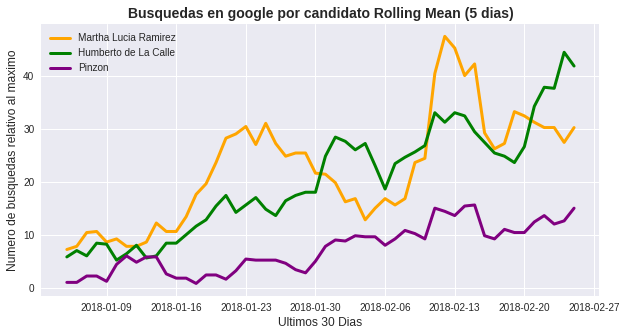

In [30]:
pl.figure(figsize=(10,5))

pl.plot(dia, MediaMLR, label = "Martha Lucia Ramirez", lw=3, color = "orange")
pl.plot(dia, MediaHDLC, label = "Humberto de La Calle", lw=3, color = "green")
pl.plot(dia, MediaPinzon, label = "Pinzon", lw=3, color = "purple")

plt.xlabel("Ultimos 30 Dias", fontsize=12)
plt.ylabel("Numero de busquedas relativo al maximo", fontsize=12)
plt.title("Busquedas en google por candidato Rolling Mean (5 dias)", weight='bold', fontsize=14)
pl.legend()

In [31]:
df.Pinzon.describe()

count    56.000000
mean      7.428571
std       6.922577
min       0.000000
25%       0.000000
50%       7.000000
75%      11.000000
max      32.000000
Name: Pinzon, dtype: float64

In [32]:
df.HDLC.describe()

count    56.000000
mean     20.107143
std      14.214818
min       0.000000
25%      11.500000
50%      19.000000
75%      29.000000
max      69.000000
Name: HDLC, dtype: float64

In [33]:
df.MLR.describe()

count     56.000000
mean      22.214286
std       16.414754
min        0.000000
25%       11.000000
50%       18.500000
75%       31.000000
max      100.000000
Name: MLR, dtype: float64

In [39]:
df = df[["Pinzon", "HDLC", "MLR"]]

In [40]:
df.describe()

,Pinzon,HDLC,MLR
count,56.000000,56.000000,56.000000
mean,7.428571,20.107143,22.214286
std,6.922577,14.214818,16.414754
min,0.000000,0.000000,0.000000
25%,0.000000,11.500000,11.000000
50%,7.000000,19.000000,18.500000
75%,11.000000,29.000000,31.000000
max,32.000000,69.000000,100.000000


In [41]:
semana1 = df[0:7]

In [42]:
semana4 = df[23:30]

In [43]:
semana7 = df[49:56]

In [46]:
semana1.mean()

Pinzon    1.571429
HDLC      5.000000
MLR       8.571429
dtype: float64

In [47]:
semana4.mean()

Pinzon     4.571429
HDLC      18.142857
MLR       23.857143
dtype: float64

In [48]:
semana7.mean()

Pinzon    14.000000
HDLC      37.714286
MLR       31.857143
dtype: float64

In [51]:
labels = ["Pinzon","HDLC", "MLR"]

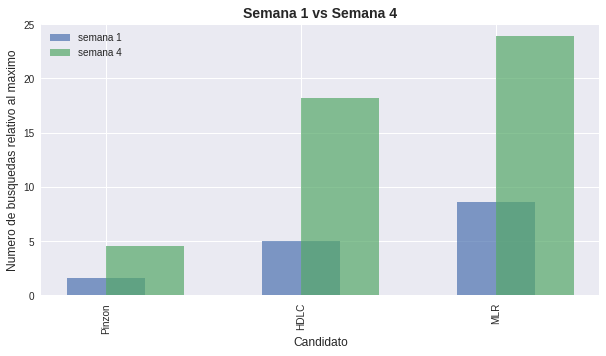

In [57]:
plt.figure(figsize=(10,5))
N = len(df.T)
x = range(N)

plt.xticks(x, labels)
plt.xticks(rotation=90)
pl.bar(x, (semana1.mean(axis=0)), align="center", label = "semana 1", width=0.4, alpha = 0.7)
pl.bar(x, (semana4.mean(axis=0)), align="edge", label = "semana 4", width=0.4, alpha = 0.7)
plt.xlabel("Candidato", fontsize=12)
plt.ylabel("Numero de busquedas relativo al maximo", fontsize=12)
plt.title("Semana 1 vs Semana 4", weight='bold', fontsize=14)
pl.legend()


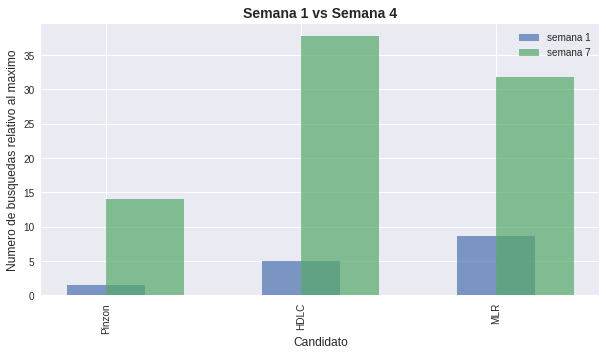

In [56]:
plt.figure(figsize=(10,5))
N = len(df.T)
x = range(N)

plt.xticks(x, labels)
plt.xticks(rotation=90)
pl.bar(x, (semana1.mean(axis=0)), align="center", label = "semana 1", width=0.4, alpha = 0.7)
pl.bar(x, (semana7.mean(axis=0)), align="edge", label = "semana 7", width=0.4, alpha = 0.7)
plt.xlabel("Candidato", fontsize=12)
plt.ylabel("Numero de busquedas relativo al maximo", fontsize=12)
plt.title("Semana 1 vs Semana 4", weight='bold', fontsize=14)
pl.legend()


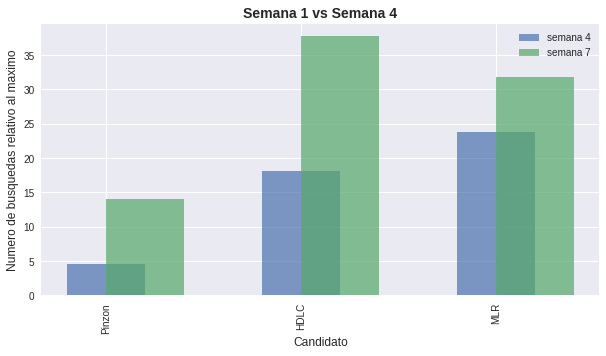

In [55]:
plt.figure(figsize=(10,5))
N = len(df.T)
x = range(N)

plt.xticks(x, labels)
plt.xticks(rotation=90)
pl.bar(x, (semana4.mean(axis=0)), align="center", label = "semana 4", width=0.4, alpha = 0.7)
pl.bar(x, (semana7.mean(axis=0)), align="edge", label = "semana 7", width=0.4, alpha = 0.7)
plt.xlabel("Candidato", fontsize=12)
plt.ylabel("Numero de busquedas relativo al maximo", fontsize=12)
plt.title("Semana 1 vs Semana 4", weight='bold', fontsize=14)
pl.legend()